In [10]:
!kaggle datasets download parisrohan/credit-score-classification

100%|██████████████████████████████████████| 9.51M/9.51M [00:08<00:00, 1.19MB/s]
100%|██████████████████████████████████████| 9.51M/9.51M [00:08<00:00, 1.18MB/s]


In [161]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [162]:
df = pd.read_csv("train.csv", low_memory=False)
test = pd.read_csv("test.csv", low_memory=False)

In [163]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [164]:
df.shape

(100000, 28)

In [165]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [166]:
#Drop features which are not of importance in determining the credit score
d_col = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN','Num_Bank_Accounts','Num_Bank_Accounts', 
      'Num_Credit_Card', 'Interest_Rate','Num_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries',
      'Credit_Utilization_Ratio','Amount_invested_monthly']

drop_df = df.drop(d_col, axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,Good,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,Good,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,Good,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,Good,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",23,7,_,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.86622816574095,Poor
99996,25,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",18,7,_,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.651610435322,Poor
99997,25,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",27,6,Good,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.8090832742814,Poor
99998,25,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",20,NaN,Good,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.1649785257098,Standard


# Replace Invalid Values to NULL

In [167]:
#Explore the NAN value in the dataset
drop_df.isnull().sum()

Age                           0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary     15002
Type_of_Loan              11408
Delay_from_due_date           0
Num_of_Delayed_Payment     7002
Credit_Mix                    0
Outstanding_Debt              0
Credit_History_Age         9030
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Payment_Behaviour             0
Monthly_Balance            1200
Credit_Score                  0
dtype: int64

In [169]:
#Drop it
drop_na = drop_df.dropna().copy()

# Transforming

In [170]:
drop_na.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
6,23,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,Good,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,_______,34847.84,3037.986667,Credit-Builder Loan,3,4,Good,605.03,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986667,Credit-Builder Loan,7,1,Good,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84_,3037.986667,Credit-Builder Loan,3,-1,_,605.03,26 Years and 9 Months,No,18.816215,High_spent_Large_value_payments,466.46647639764313,Standard


In [171]:
#check for unique or incorrect values

for i in drop_na:
    print('\n', i, drop_na[i].unique())


 Age ['23' '28_' '28' ... '8425' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Mechanic' 'Writer'
 'Accountant' 'Architect' 'Musician' 'Developer']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]

 Type_of_Loan ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']

 Delay_from_due_date [ 3  7  5 13 10  8  0  4 -1 30 34 27 14 11  2 -2  1 16 17 23 22 15 12 51
 53 48 43 52 28 25 20 49 61 31 26 29 18 50 45  6 56 59 55 57 54 62 67 36
 41 19 21 24 65 32  9

In [173]:
#Impute incorrect data formats
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [174]:
# Revise the incorrect data
sym = '\\`*_{}[]()>#@+!$:;'
col_int = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
           'Outstanding_Debt','Total_EMI_per_month', 'Monthly_Balance']

col_str = ['Occupation', 'Credit_History_Age','Payment_of_Min_Amount','Credit_Score']

for i in col_int:
    for c in sym:
        drop_na[i] = drop_na[i].astype(str).str.replace(c,'')
        
for i in col_str:
    for c in sym:
        drop_na[i] = drop_na[i].replace(c,'')

drop_na.head()

/var/folders/nf/g_4jhvds3hl6w0x8k1y827z80000gn/T/ipykernel_98553/3558055212.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drop_na[i] = drop_na[i].astype(str).str.replace(c,'')


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
6,23,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,Good,809.98,22 Years and 7 Months,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,3037.986667,Credit-Builder Loan,7,1,Good,605.03,26 Years and 8 Months,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84,3037.986667,Credit-Builder Loan,3,-1,_,605.03,26 Years and 9 Months,No,18.816214573128885,High_spent_Large_value_payments,466.46647639764313,Standard
12,28,Teacher,34847.84,3037.986667,Credit-Builder Loan,3,1,Good,605.03,26 Years and 11 Months,No,18.816214573128885,Low_spent_Small_value_payments,444.8670318506144,Good


In [175]:
#Transform the information to the value
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months', '')

In [176]:
print(drop_na['Payment_Behaviour'].unique())

drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head()

['High_spent_Small_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Large_value_payments' 'Low_spent_Medium_value_payments']


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
6,23,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,Good,809.98,22.7,No,49.57494921489417,1,244.5653167062043,Good
9,28,Teacher,34847.84,3037.986667,Credit-Builder Loan,7,1,Good,605.03,26.8,No,18.816214573128885,6,484.5912142650067,Good
10,28,Teacher,34847.84,3037.986667,Credit-Builder Loan,3,-1,_,605.03,26.9,No,18.816214573128885,6,466.46647639764313,Standard
12,28,Teacher,34847.84,3037.986667,Credit-Builder Loan,3,1,Good,605.03,26.11,No,18.816214573128885,1,444.8670318506144,Good


In [177]:
#Transform object data type to float

col_int2 = ['Age', 'Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']

for i in col_int2:
    drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Monthly_Inhand_Salary     float64
Type_of_Loan               object
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Credit_Mix                 object
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [178]:
# Transform the target data to numerical
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Good', '3', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Standard', '2', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Poor', '1', n=-1)
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)

drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('NM','0')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('Yes','1')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('No','2')
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,_,809.98,22.10,2,49.574949,4.0,312.494089,3
6,23.0,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,Good,809.98,22.70,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,7.0,1.0,Good,605.03,26.80,2,18.816215,6.0,484.591214,3
10,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,3.0,-1.0,_,605.03,26.90,2,18.816215,6.0,466.466476,2
12,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,3.0,1.0,Good,605.03,26.11,2,18.816215,1.0,444.867032,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,1929.906667,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,Bad,3571.70,6.30,1,60.964772,6.0,337.362988,2
99994,25.0,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",20.0,6.0,_,502.38,31.50,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",23.0,7.0,_,502.38,31.60,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",18.0,7.0,_,502.38,31.70,2,35.104023,5.0,496.651610,1


In [179]:
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Monthly_Inhand_Salary     float64
Type_of_Loan               object
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Credit_Mix                 object
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [180]:
#Drop Duplicates data

drop_na.count()

Age                       54108
Occupation                54108
Annual_Income             54108
Monthly_Inhand_Salary     54108
Type_of_Loan              54108
Delay_from_due_date       54108
Num_of_Delayed_Payment    54108
Credit_Mix                54108
Outstanding_Debt          54108
Credit_History_Age        54108
Payment_of_Min_Amount     54108
Total_EMI_per_month       54108
Payment_Behaviour         54108
Monthly_Balance           54108
Credit_Score              54108
dtype: int64

In [181]:
drop_na.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,_,809.98,22.10,2,49.574949,4.0,312.494089,3
6,23.0,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,Good,809.98,22.70,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,7.0,1.0,Good,605.03,26.80,2,18.816215,6.0,484.591214,3
10,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,3.0,-1.0,_,605.03,26.90,2,18.816215,6.0,466.466476,2
12,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,3.0,1.0,Good,605.03,26.11,2,18.816215,1.0,444.867032,3


In [182]:
df_cleaned = drop_na

In [183]:
df_cleaned.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,54108.000000,5.410800e+04,54108.000000,54108.000000,54108.000000,54108.000000,54108.000000,54108.000000,54108.000000,54108.00000,5.410800e+04,54108.000000
mean,110.551360,1.739886e+05,4023.162004,22.017336,31.855992,1507.050660,17.685774,1.202096,1396.363352,3.24647,-3.696311e+22,1.848673
std,687.331894,1.434847e+06,3100.345777,15.240867,230.438985,1186.641503,8.309110,0.633452,8213.824414,1.84659,3.509971e+24,0.671492
min,-500.000000,7.005930e+03,303.645417,-5.000000,-3.000000,0.230000,0.100000,0.000000,4.462837,1.00000,-3.333333e+26,1.000000
25%,24.000000,1.877166e+04,1567.845833,10.000000,9.000000,606.480000,11.100000,1.000000,41.125298,1.00000,2.645331e+02,1.000000
50%,33.000000,3.597054e+04,2980.381667,19.000000,14.000000,1241.940000,17.500000,1.000000,78.271158,3.00000,3.250191e+02,2.000000
75%,42.000000,6.993398e+04,5715.360417,29.000000,19.000000,2132.460000,24.110000,2.000000,168.693842,5.00000,4.446506e+02,2.000000
max,8682.000000,2.419806e+07,15204.633333,67.000000,4397.000000,4998.070000,33.800000,2.000000,82331.000000,6.00000,1.552946e+03,3.000000


In [185]:
#Drop outlier by IQR
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income']<(Q1-1.5*IQR)].index)
df_cleaned

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,_,809.98,22.10,2,49.574949,4.0,312.494089,3
6,23.0,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,Good,809.98,22.70,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,7.0,1.0,Good,605.03,26.80,2,18.816215,6.0,484.591214,3
10,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,3.0,-1.0,_,605.03,26.90,2,18.816215,6.0,466.466476,2
12,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,3.0,1.0,Good,605.03,26.11,2,18.816215,1.0,444.867032,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,1929.906667,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,Bad,3571.70,6.30,1,60.964772,6.0,337.362988,2
99994,25.0,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",20.0,6.0,_,502.38,31.50,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",23.0,7.0,_,502.38,31.60,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,3359.415833,"Auto Loan, and Student Loan",18.0,7.0,_,502.38,31.70,2,35.104023,5.0,496.651610,1


<Axes: xlabel='Annual_Income'>

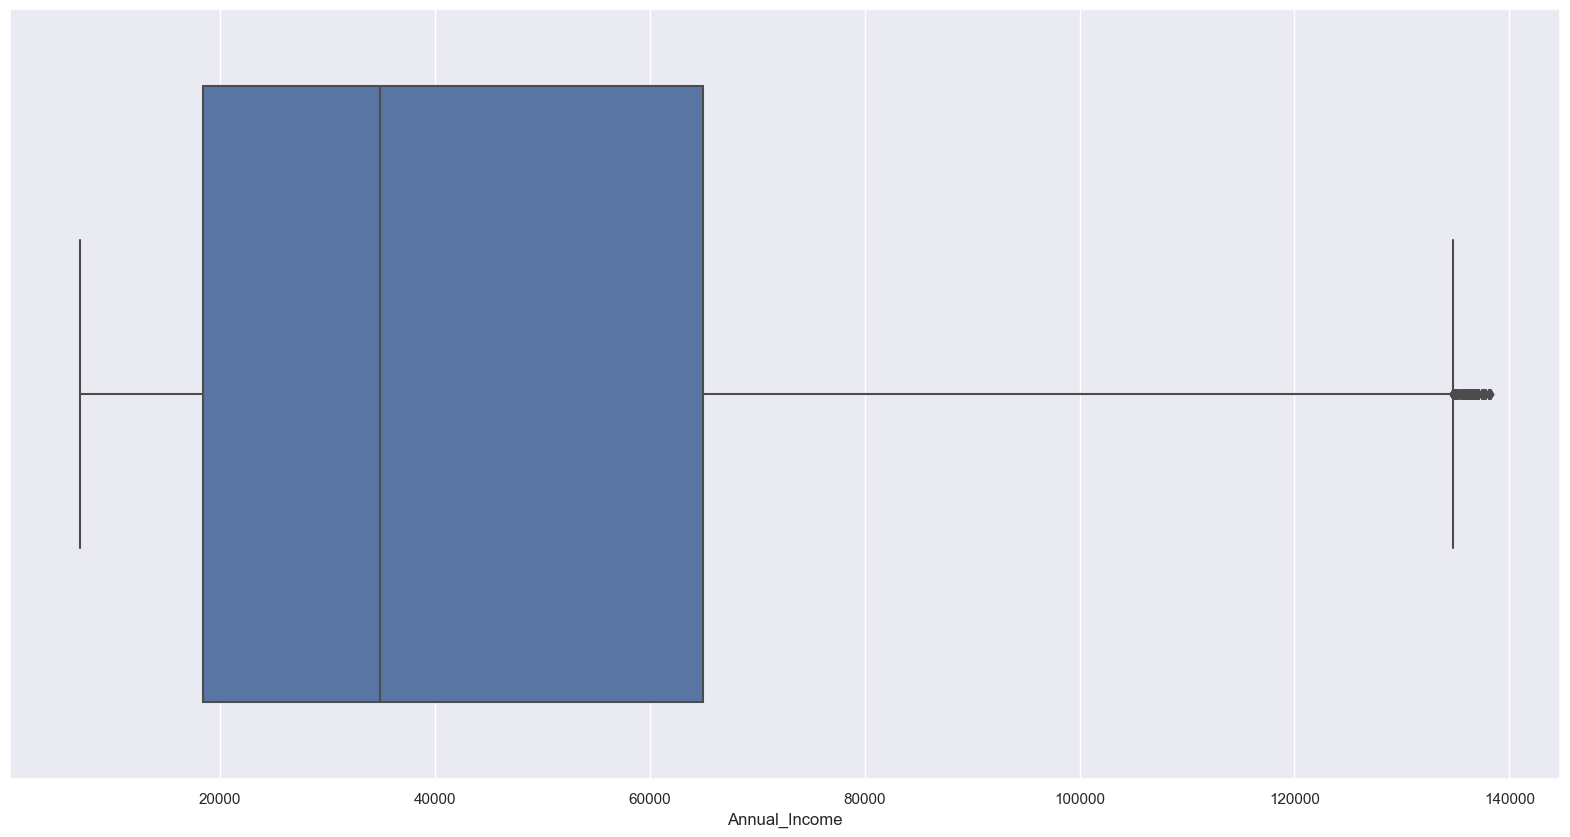

In [186]:
sns.boxplot(x=df_cleaned['Annual_Income'])

<Axes: xlabel='Outstanding_Debt'>

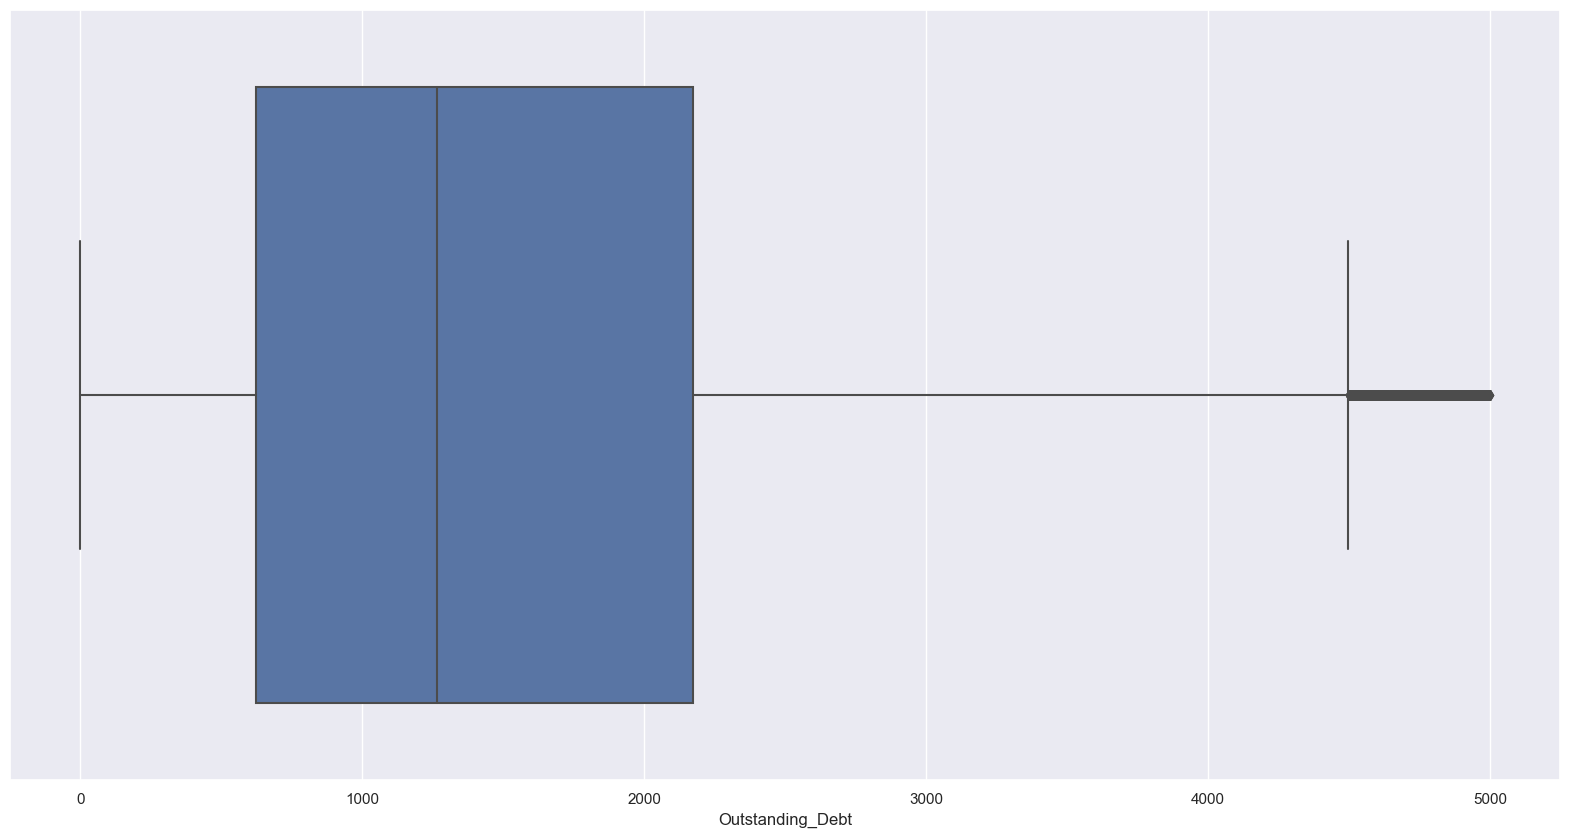

In [187]:
sns.boxplot(x=df_cleaned['Outstanding_Debt'])

In [188]:
## Checking data

occupation_count = df_cleaned['Occupation'].value_counts(dropna=False)
occupation_count

Lawyer           3750
Mechanic         3589
Architect        3575
Teacher          3544
Doctor           3516
Entrepreneur     3511
Media_Manager    3482
Scientist        3465
Engineer         3465
Developer        3442
Accountant       3428
Manager          3329
Journalist       3323
Writer           3283
Musician         3275
Name: Occupation, dtype: int64

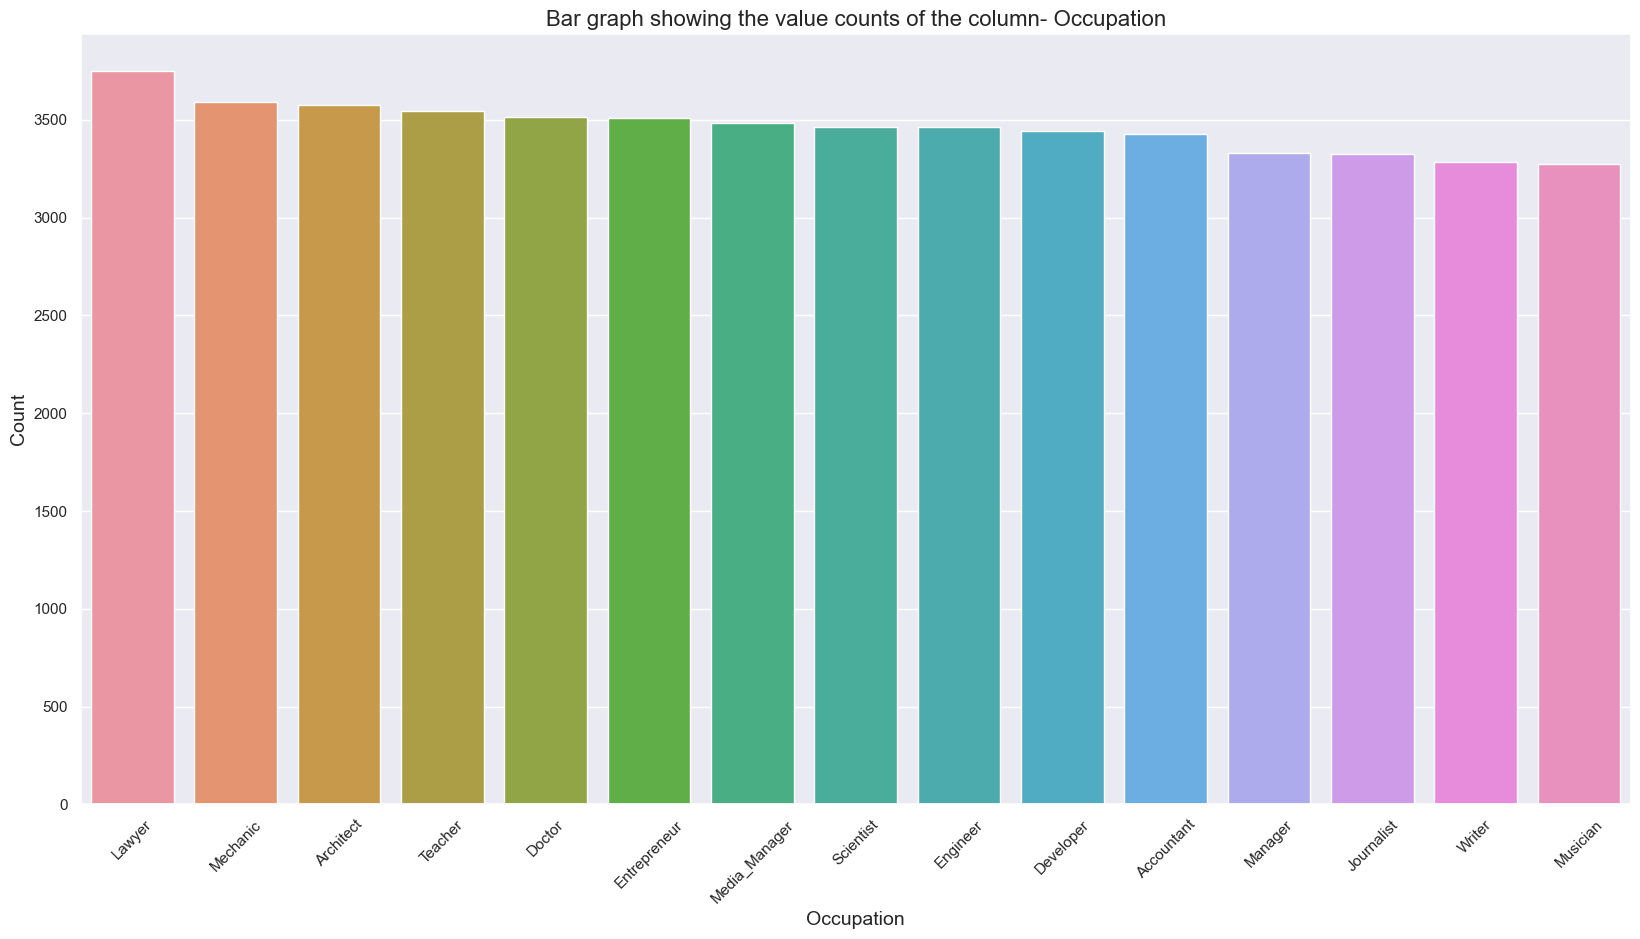

In [189]:
sns.set(rc={'figure.figsize': (20,10)})
sns.barplot(x=occupation_count.index,y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column- Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

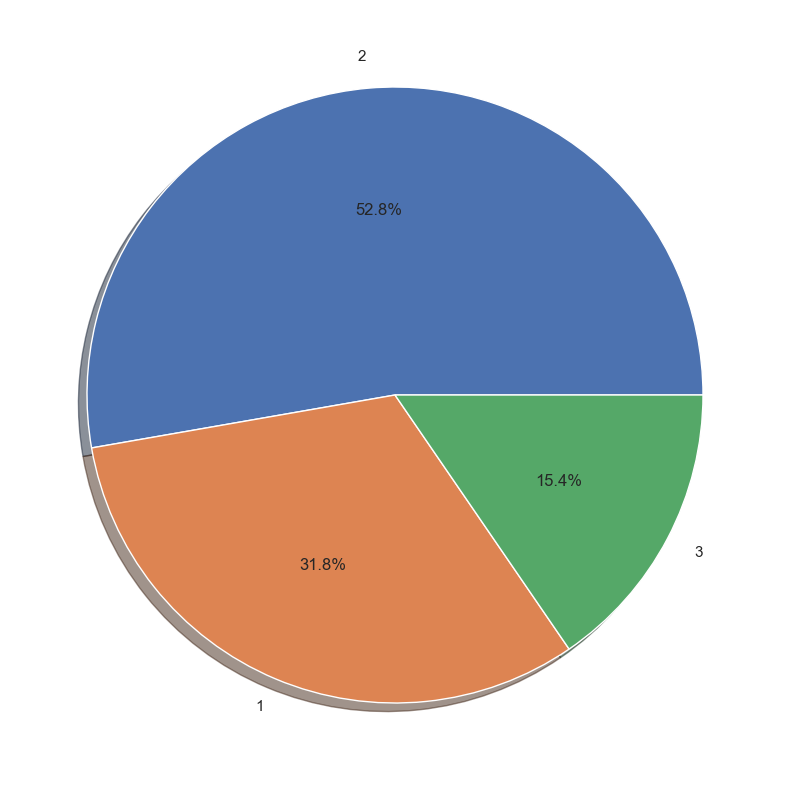

In [190]:
#Explore data balance
label = df_cleaned.Credit_Score.value_counts().index
label_count = df_cleaned.Credit_Score.value_counts().values
plt.pie(data=df_cleaned, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

/var/folders/nf/g_4jhvds3hl6w0x8k1y827z80000gn/T/ipykernel_98553/4140261881.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df_cleaned.corr()


,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.005003,0.004901,-0.007332,-0.002654,0.000246,-0.002943,0.005515,0.000797,0.005876,0.001152,0.003011
Annual_Income,0.005003,1.000000,0.997622,-0.222697,0.002505,-0.260504,0.259159,0.177795,0.008788,0.341436,-0.006163,0.192880
Monthly_Inhand_Salary,0.004901,0.997622,1.000000,-0.222526,0.002703,-0.260741,0.258600,0.177622,0.008251,0.343295,-0.006400,0.189921
Delay_from_due_date,-0.007332,-0.222697,-0.222526,1.000000,0.011757,0.568456,-0.484154,-0.331784,-0.003275,-0.074861,0.005506,-0.424315
Num_of_Delayed_Payment,-0.002654,0.002505,0.002703,0.011757,1.000000,0.009305,-0.007570,-0.005818,0.003356,0.004052,0.000992,-0.002227
Outstanding_Debt,0.000246,-0.260504,-0.260741,0.568456,0.009305,1.000000,-0.632565,-0.329581,-0.005129,-0.091730,0.002982,-0.382063
Credit_History_Age,-0.002943,0.259159,0.258600,-0.484154,-0.007570,-0.632565,1.000000,0.394500,0.006494,0.086929,-0.005131,0.394042
Payment_of_Min_Amount,0.005515,0.177795,0.177622,-0.331784,-0.005818,-0.329581,0.394500,1.000000,0.001874,0.058582,-0.002491,0.294831
Total_EMI_per_month,0.000797,0.008788,0.008251,-0.003275,0.003356,-0.005129,0.006494,0.001874,1.000000,0.002887,0.001646,0.003162
Payment_Behaviour,0.005876,0.341436,0.343295,-0.074861,0.004052,-0.091730,0.086929,0.058582,0.002887,1.000000,0.001284,0.121281


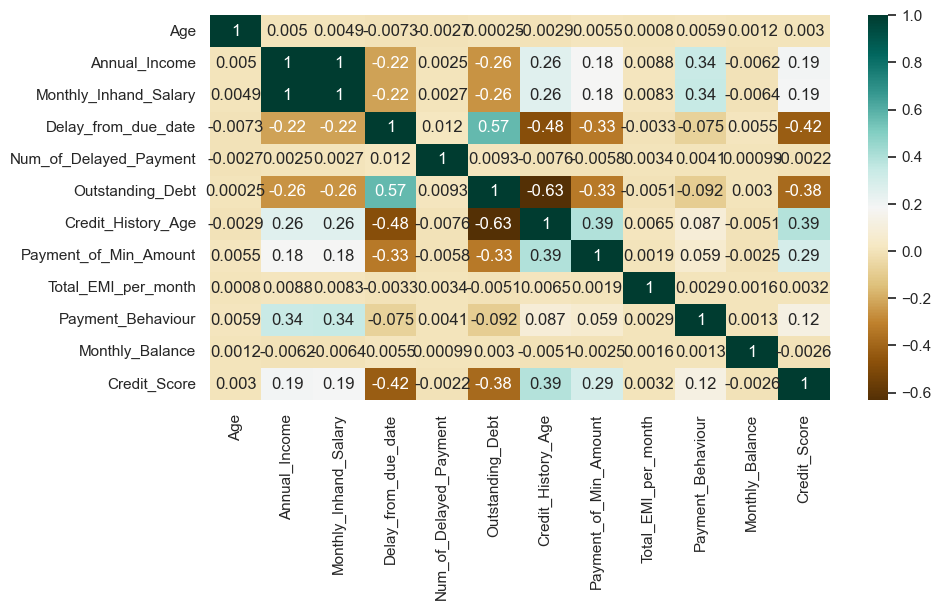

In [191]:
plt.figure(figsize=(10,5))
c = df_cleaned.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>],
       [<Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>],
       [<Axes: title={'center': 'Payment_Behaviour'}>,
        <Axes: title={'center': 'Monthly_Balance'}>,
        <Axes: title={'center': 'Credit_Score'}>]], dtype=object)

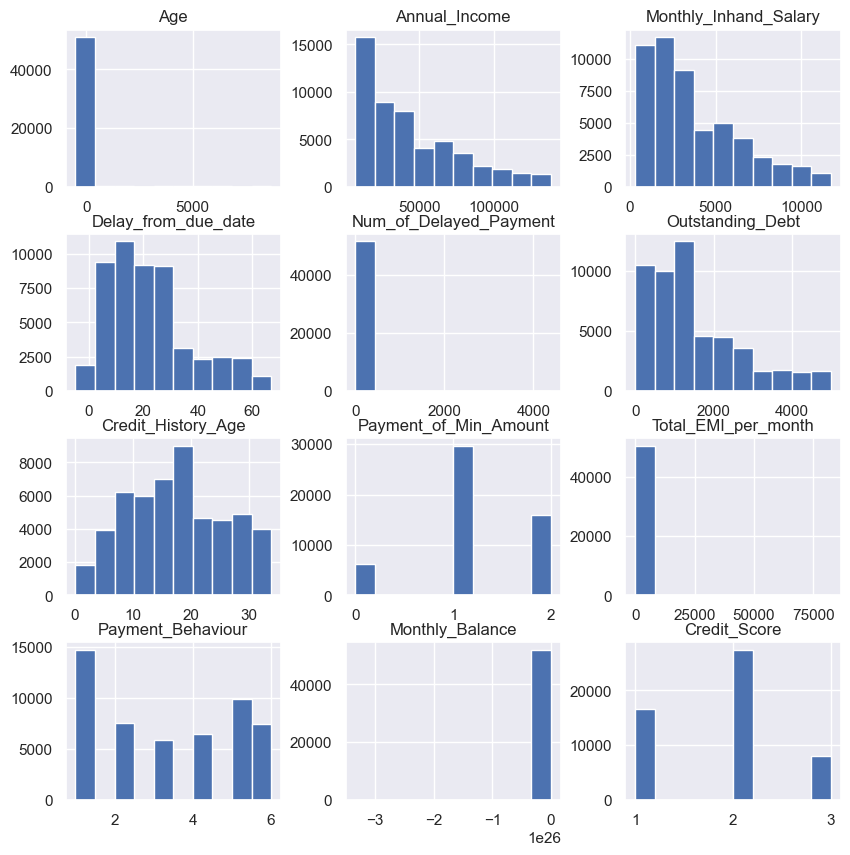

In [192]:
df_cleaned.hist(figsize=(10,10))

In [ ]:
#Normalization

In [193]:
df_cleaned.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,_,809.98,22.10,2,49.574949,4.0,312.494089,3
6,23.0,Scientist,19114.12,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,Good,809.98,22.70,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,7.0,1.0,Good,605.03,26.80,2,18.816215,6.0,484.591214,3
10,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,3.0,-1.0,_,605.03,26.90,2,18.816215,6.0,466.466476,2
12,28.0,Teacher,34847.84,3037.986667,Credit-Builder Loan,3.0,1.0,Good,605.03,26.11,2,18.816215,1.0,444.867032,3


In [194]:
scaler = MinMaxScaler()
col_float = ['Age', 'Annual_Income','Delay_from_due_date', 'Num_of_Delayed_Payment',
            'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']

for i in df_cleaned[col_float]:
    df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.056959,Scientist,0.092324,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",0.111111,0.002273,_,0.162020,0.652819,2,0.000548,4.0,1.0,3
6,0.056959,Scientist,0.092324,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",0.111111,0.002500,Good,0.162020,0.670623,2,0.000548,1.0,1.0,3
9,0.057504,Teacher,0.212292,3037.986667,Credit-Builder Loan,0.166667,0.000909,Good,0.121012,0.792285,2,0.000174,6.0,1.0,3
10,0.057504,Teacher,0.212292,3037.986667,Credit-Builder Loan,0.111111,0.000455,_,0.121012,0.795252,2,0.000174,6.0,1.0,2
12,0.057504,Teacher,0.212292,3037.986667,Credit-Builder Loan,0.111111,0.000909,Good,0.121012,0.771810,2,0.000174,1.0,1.0,3


In [ ]:
#Encoding

In [195]:
df_cleaned.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [196]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056959,0.092324,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",0.111111,0.002273,_,0.162020,0.652819,2,...,0,0,0,0,0,0,0,1,0,0
6,0.056959,0.092324,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",0.111111,0.002500,Good,0.162020,0.670623,2,...,0,0,0,0,0,0,0,1,0,0
9,0.057504,0.212292,3037.986667,Credit-Builder Loan,0.166667,0.000909,Good,0.121012,0.792285,2,...,0,0,0,0,0,0,0,0,1,0
10,0.057504,0.212292,3037.986667,Credit-Builder Loan,0.111111,0.000455,_,0.121012,0.795252,2,...,0,0,0,0,0,0,0,0,1,0
12,0.057504,0.212292,3037.986667,Credit-Builder Loan,0.111111,0.000909,Good,0.121012,0.771810,2,...,0,0,0,0,0,0,0,0,1,0


In [197]:
#select all columns
feed = df_cleaned[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]

In [198]:
df_train_x = feed.drop('Credit_Score', axis=1)
df_train_y = feed['Credit_Score']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=42)

In [ ]:
#Modelling